<a href="https://www.kaggle.com/code/abdelazizsami/project-getting-a-good-night-s-sleep?scriptVersionId=198956759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

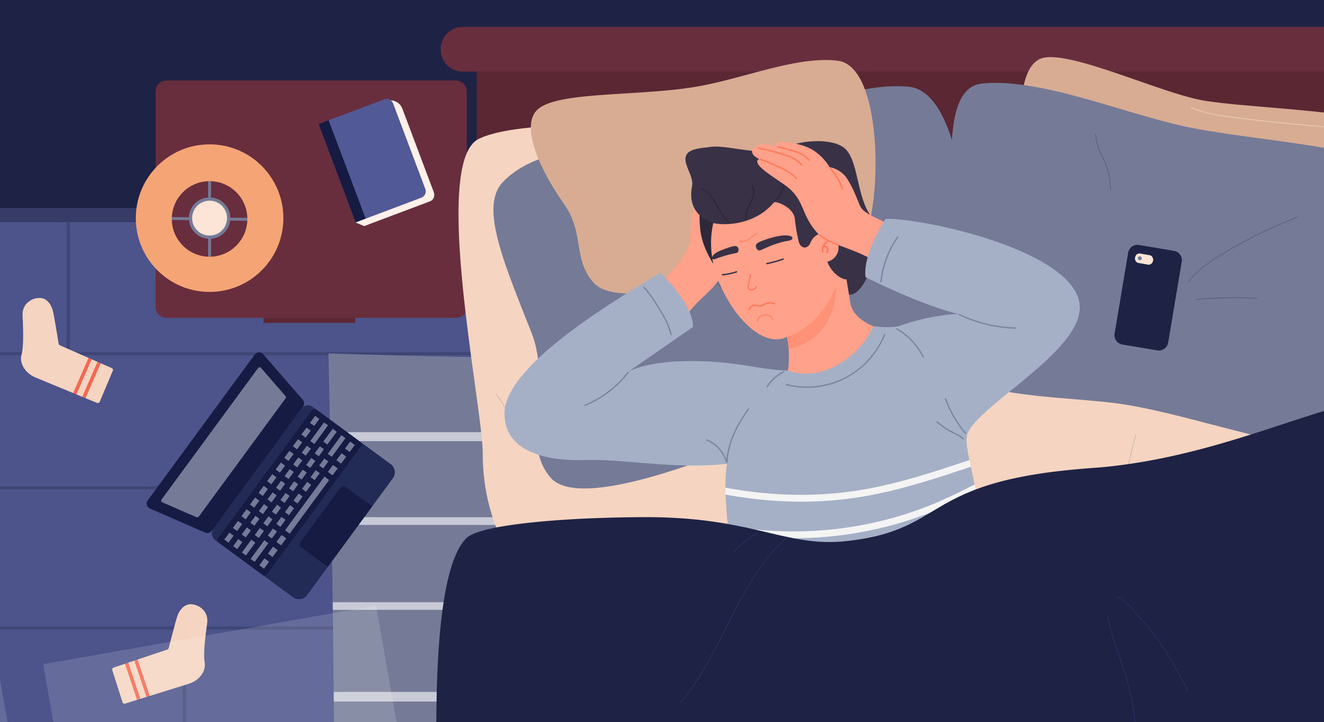

Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [1]:
# Import the pandas module
import pandas as pd

# Read in the data 
sleep_df = pd.read_csv('/kaggle/input/getting-a-good-nights-sleep/sleep_health_data.csv')

# 1. Which occupation has the lowest average sleep duration? Save this in a string variable called `lowest_sleep_occ`.

# Groupby occupation and calculate mean sleep duration 
sleep_duration = sleep_df.groupby('Occupation')['Sleep Duration'].mean()
# Get occupation with lowest average sleep duration
lowest_sleep_occ = sleep_duration.sort_values().index[0]

# 2. Which occupation had the lowest quality of on average? Did the occupation with the lowest sleep duration also have the worst sleep quality?

# Groupby occupation and calculate average sleep quality
sleep_quality = sleep_df.groupby('Occupation')['Quality of Sleep'].mean()  
# Get occupation with lowest average sleep quality 
lowest_sleep_quality_occ = sleep_quality.sort_values().index[0]

# Compare occupation with the least sleep to occupation with the lowest sleep quality
if lowest_sleep_occ == lowest_sleep_quality_occ:
  same_occ = True
else:
  same_occ = False
  
# 3. Let's explore how BMI Category can affect sleep disorder rates. Start by finding what ratio of app users in each BMI category have been diagnosed with Insomnia.

# Normal
# Filter the full dataframe to only rows where BMI Category is Normal and Sleep Disorder is Insomnia.
normal = sleep_df[(sleep_df["BMI Category"] == "Normal") &  
                  (sleep_df["Sleep Disorder"] == "Insomnia")]
normal2 = sleep_df[(sleep_df["BMI Category"] == "Normal Weight") &  
                  (sleep_df["Sleep Disorder"] == "Insomnia")]
# Total normal rows               
total_normal = len(sleep_df[sleep_df["BMI Category"] == "Normal"])  
# Calculate normal insomnia ratio               
normal_insomnia_ratio = round(len(normal) / total_normal, 2) 


# Overweight
# Filter the full dataframe to only rows where BMI Category is Overweight and Sleep Disorder is Insomnia.
overweight = sleep_df[(sleep_df["BMI Category"] == "Overweight") &   
                      (sleep_df["Sleep Disorder"] == "Insomnia")]  
# Total overweight rows
total_overweight = len(sleep_df[sleep_df["BMI Category"] == "Overweight"])  
# Calculate overweight insomnia ratio 
overweight_insomnia_ratio = round(len(overweight) / total_overweight, 2)


# Obese
# Filter the full dataframe to only rows where BMI Category is Obese and Sleep Disorder is Insomnia.
obese = sleep_df[(sleep_df["BMI Category"] == "Obese") &  
                  (sleep_df["Sleep Disorder"] == "Insomnia")]
# Total obese rows          
total_obese = len(sleep_df[sleep_df["BMI Category"] == "Obese"])  
# Calculate obese insomnia ratio
obese_insomnia_ratio = round(len(obese) / total_obese, 2)


# Create dictionary to store the ratios for each BMI category 
bmi_insomnia_ratios = {
    "Normal": normal_insomnia_ratio,  
    "Overweight": overweight_insomnia_ratio,
    "Obese": obese_insomnia_ratio 
}
